In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso, BayesianRidge, LinearRegression
from sklearn.dummy import DummyRegressor
import logging
import data_loader as loader
import my_module as mod

# Настройка логирования с выводом сообщений в консоль
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Загрузка данных
logger.info("Начало загрузки данных.")
dataF = loader.load_dataF_csv('day.csv', 'cnt')
# Логирование
logger.info("Данные успешно загружены.")

2025-03-09 20:49:54,524 - INFO - Начало загрузки данных.
2025-03-09 20:49:54,525 - INFO - Загрузка данных из CSV файла: day.csv
2025-03-09 20:49:54,530 - INFO - Данные успешно загружены
2025-03-09 20:49:54,531 - INFO - Данные успешно загружены.


In [2]:
# Получение информации о датасете
logger.info("Получение статистической информации о датасете.")
mod.statistic_dataF(dataF)  

2025-03-09 20:49:58,802 - INFO - Получение статистической информации о датасете.
2025-03-09 20:49:58,803 - INFO - Вывод статистической информации о данных.
2025-03-09 20:49:58,804 - INFO - Первые строки данных:
2025-03-09 20:49:58,816 - INFO - Основная информация о данных:
2025-03-09 20:49:58,821 - INFO - Описательная статистика:
2025-03-09 20:49:58,843 - INFO - Проверка на пропущенные значения:


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

<class 'pandas.core.frame

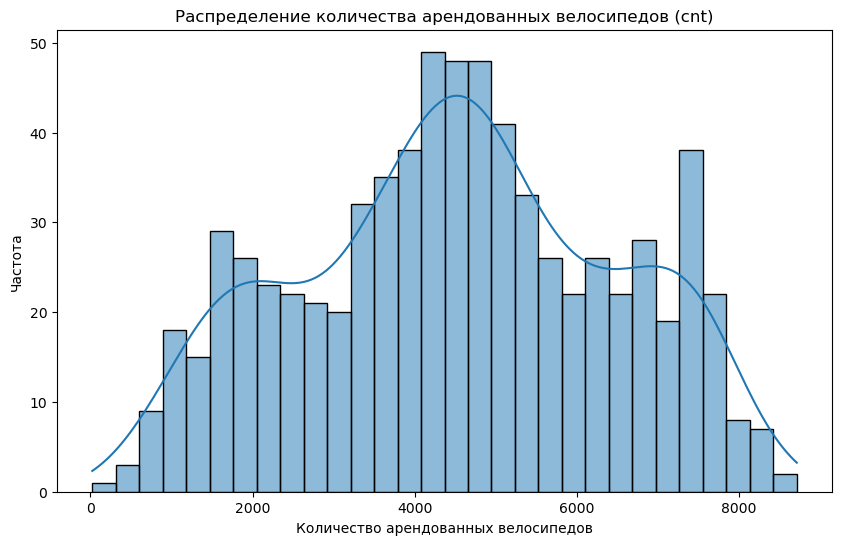

In [3]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(dataF['cnt'], bins=30, kde=True)
plt.title('Распределение количества арендованных велосипедов (cnt)')
plt.xlabel('Количество арендованных велосипедов')
plt.ylabel('Частота')
plt.show()

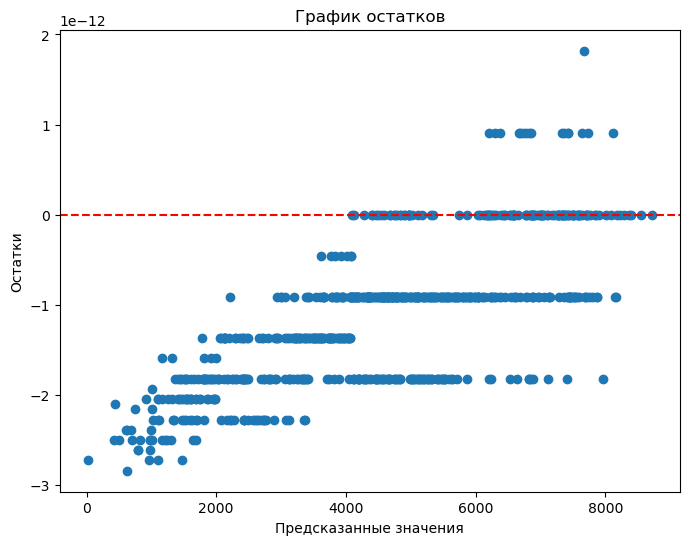

In [4]:
# Удаление столбца с датой
df = dataF.drop(['dteday', 'instant'], axis=1) 

# Разделение данных
X = df[['registered', 'casual', 'atemp', 'temp', 'yr', 'season', 'mnth', 'weekday', 'workingday', 'holiday', 'hum','windspeed', 'weathersit']]
y = df['cnt']

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Остатки
residuals = y - y_pred

# Визуализация остатков
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()


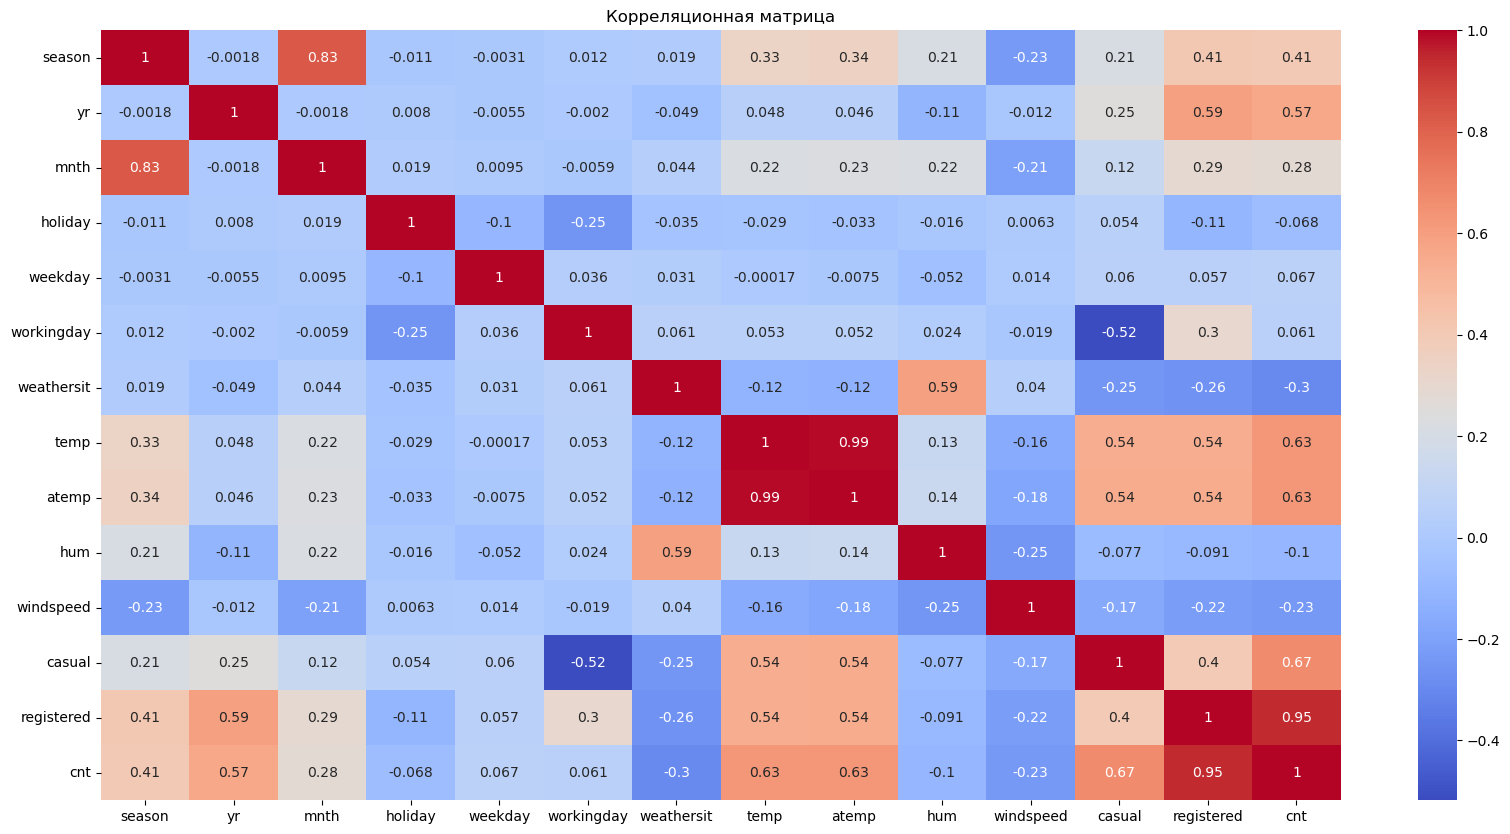

2025-03-09 20:52:15,783 - INFO - Разведочный анализ данных завершен.


In [5]:
# Построение корреляционной матрицы
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Логирование
logger.info("Разведочный анализ данных завершен.")

2025-03-09 20:58:03,308 - INFO - Начало предобработки данных.
2025-03-09 20:58:03,315 - INFO - Предобработка данных завершена.
2025-03-09 20:58:03,316 - INFO - Начало обучения моделей.
2025-03-09 20:58:03,374 - INFO - Обучение модели: Gradient Boosting


Ridge Regression CV MSE: 813463.83
Lasso Regression CV MSE: 822591.37
Bayesian Ridge CV MSE: 808301.60


2025-03-09 20:58:03,559 - INFO - Обучение модели: Extra Trees
2025-03-09 20:58:03,757 - INFO - Обучение модели: AdaBoost
2025-03-09 20:58:03,862 - INFO - Обучение модели: Ridge Regression
2025-03-09 20:58:03,867 - INFO - Обучение модели: Lasso Regression
2025-03-09 20:58:03,875 - INFO - Обучение модели: Bayesian Ridge
2025-03-09 20:58:03,881 - INFO - Обучение модели: Dummy Regressor
2025-03-09 20:58:03,885 - INFO - Обучение моделей завершено.


Модель: Gradient Boosting
Train MSE: 170567.88, Test MSE: 438669.75
Train MAE: 304.40, Test MAE: 462.77
Train R2: 0.95, Test R2: 0.89
----------------------------------------
Модель: Extra Trees
Train MSE: 0.00, Test MSE: 458753.76
Train MAE: 0.00, Test MAE: 437.56
Train R2: 1.00, Test R2: 0.89
----------------------------------------
Модель: AdaBoost
Train MSE: 558049.16, Test MSE: 838504.05
Train MAE: 619.13, Test MAE: 698.02
Train R2: 0.85, Test R2: 0.79
----------------------------------------
Модель: Ridge Regression
Train MSE: 765831.54, Test MSE: 691108.62
Train MAE: 648.87, Test MAE: 617.59
Train R2: 0.79, Test R2: 0.83
----------------------------------------
Модель: Lasso Regression
Train MSE: 765820.06, Test MSE: 691076.00
Train MAE: 648.91, Test MAE: 617.44
Train R2: 0.79, Test R2: 0.83
----------------------------------------
Модель: Bayesian Ridge
Train MSE: 765986.04, Test MSE: 691499.05
Train MAE: 648.81, Test MAE: 618.51
Train R2: 0.79, Test R2: 0.83
------------------

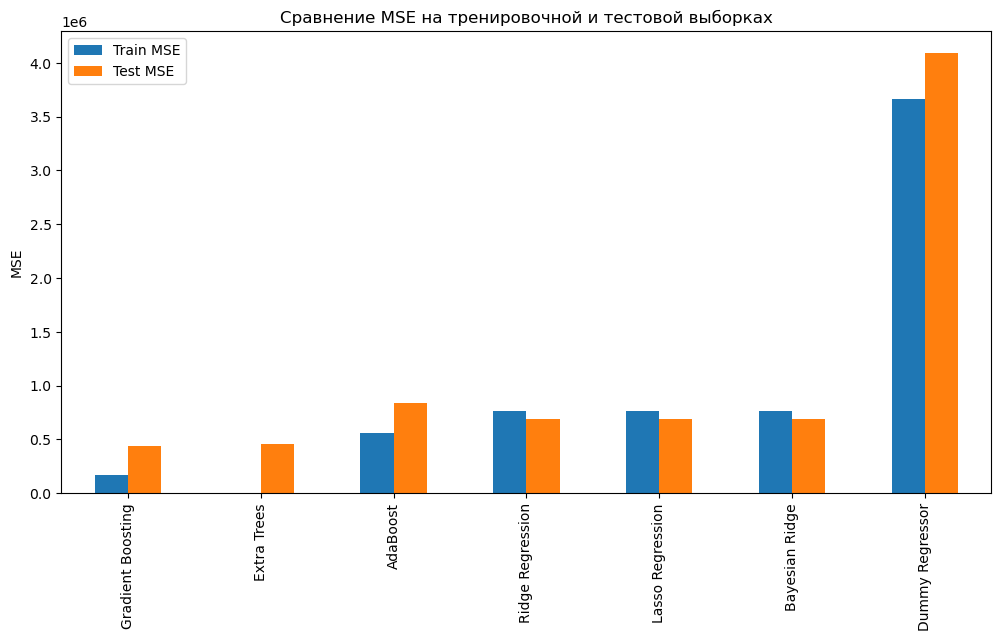

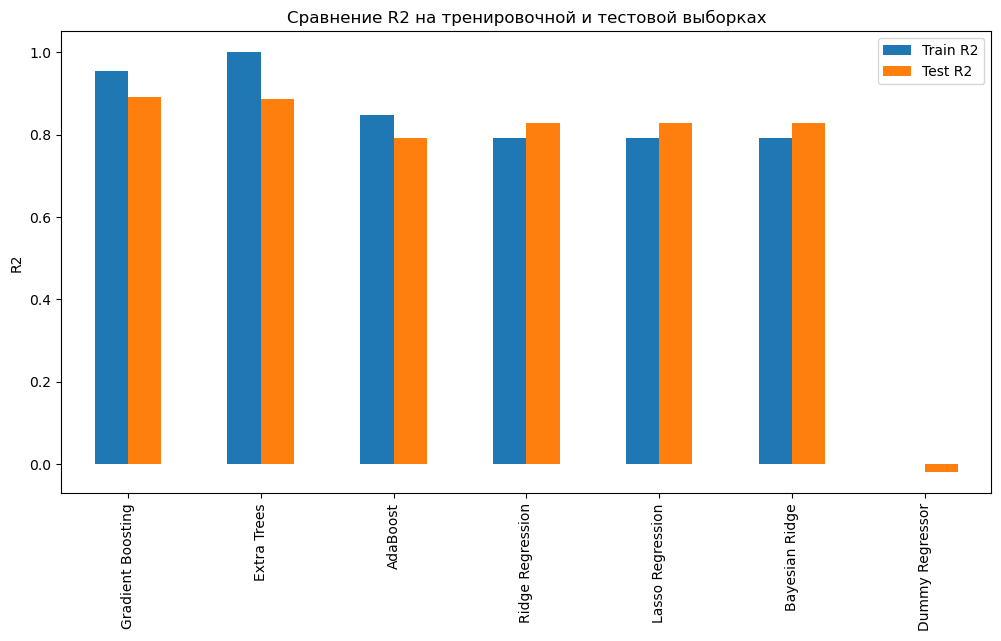

2025-03-09 20:58:04,231 - INFO - Анализ завершен.


In [8]:
from sklearn.model_selection import cross_val_score

# Предобработка данных
logger.info("Начало предобработки данных.")

# Удаление ненужных столбцов
df1 = df.drop(['casual', 'registered'], axis=1)  # если не удаляем, многие уходят в переобучение

# Разделение на признаки и целевую переменную
X = df1.drop('cnt', axis=1)
y = df1['cnt']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Логирование
logger.info("Предобработка данных завершена.")

# Обучение моделей
logger.info("Начало обучения моделей.")

# Добавление кросс-валидации для линейных регрессоров
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression CV MSE: {-np.mean(ridge_scores):.2f}")
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1, max_iter=5000)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression CV MSE: {-np.mean(lasso_scores):.2f}")
lasso_model.fit(X_train, y_train)

bayesian_model = BayesianRidge()
bayesian_scores = cross_val_score(bayesian_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Bayesian Ridge CV MSE: {-np.mean(bayesian_scores):.2f}")
bayesian_model.fit(X_train, y_train)

models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Bayesian Ridge": bayesian_model,
    "Dummy Regressor": DummyRegressor()
}

results = {}

for name, model in models.items():
    logger.info(f"Обучение модели: {name}")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Расчет метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R2": train_r2,
        "Test R2": test_r2
    }

# Логирование
logger.info("Обучение моделей завершено.")

# Вывод результатов
for name, metrics in results.items():
    print(f"Модель: {name}")
    print(f"Train MSE: {metrics['Train MSE']:.2f}, Test MSE: {metrics['Test MSE']:.2f}")
    print(f"Train MAE: {metrics['Train MAE']:.2f}, Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Train R2: {metrics['Train R2']:.2f}, Test R2: {metrics['Test R2']:.2f}")
    print("-" * 40)

# Визуализация результатов
metrics_df = pd.DataFrame(results).T
metrics_df[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение MSE на тренировочной и тестовой выборках')
plt.ylabel('MSE')
plt.show()

metrics_df[['Train R2', 'Test R2']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение R2 на тренировочной и тестовой выборках')
plt.ylabel('R2')
plt.show()

# Логирование
logger.info("Анализ завершен.")

In [ ]:
"""
Лучшая модель: Gradient Boosting показывает наилучшее качество на тестовых данных (R2 = 0.89) с умеренным переобучением.
Переобучение: Extra Trees сильно переобучена (Train MSE = 0), но все еще показывает хорошее качество на тестовых данных (R2 = 0.89). Требует настройки гиперпараметров.
Линейные модели: Ridge, Lasso и Bayesian Ridge показывают стабильное, но более низкое качество (R2 = 0.83). Они хуже ансамблевых методов, но лучше, чем Dummy Regressor.
AdaBoost: Показывает среднее качество (R2 = 0.79) и требует настройки.
Dummy Regressor: Используется как базовый уровень для сравнения. Все модели значительно превосходят его.
"""

In [10]:
# попробуем подобрать гиперпараметры для для Gradient Boosting и Extra Trees и сравним с ними и без
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from scipy.stats import randint, uniform

# Определение гиперпараметров для Gradient Boosting
gb_params = {
    'n_estimators': [50, 75],  # Количество деревьев [50, 100, 200] 
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 4],  # Максимальная глубина деревьев  [1, 3, 5]
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разделения
    'min_samples_leaf': [1, 2, 4],  # Минимальное количество образцов в листе
    'subsample': [0.7, 0.8],  # Доля образцов для обучения каждого дерева  [0.8, 0.9, 1.0]
    'max_features': ['sqrt', 'log2']  # Количество признаков для разделения
}

# Определение гиперпараметров для Extra Trees
et_params = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [10, 15, 20],  # Максимальная глубина деревьев [None, 10, 20, 30]
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разделения
    'min_samples_leaf': [1, 2, 4],  # Минимальное количество образцов в листе
    'max_features': ['sqrt'],  # Количество признаков для разделения ['sqrt', 'log2']
    'bootstrap': [True]  # Использование bootstrap-выборки [True, False] 
}

# Поиск лучших параметров для Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_search = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_search.fit(X_train, y_train)

# Поиск лучших параметров для Extra Trees
et_model = ExtraTreesRegressor(random_state=42)
et_search = RandomizedSearchCV(et_model, et_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=20)
et_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для Gradient Boosting:", gb_search.best_params_)
print("Лучшие параметры для Extra Trees:", et_search.best_params_)

# Обучение моделей с лучшими параметрами
best_gb = gb_search.best_estimator_
best_et = et_search.best_estimator_

# Оценка качества моделей
models.update({
    "Gradient Boosting (оптимизированный)": best_gb,
    "Extra Trees (оптимизированный)": best_et
})

logger.info("Вывод метрик")
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    if name in ("Gradient Boosting (оптимизированный)", "Extra Trees (оптимизированный)") :
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
    
        results[name] = {
            "Train MSE": train_mse,
            "Test MSE": test_mse,
            "Train MAE": train_mae,
            "Test MAE": test_mae,
            "Train R2": train_r2,
            "Test R2": test_r2
        }

        print(f"Модель: {name}")
        print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
        print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
        print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")
        print("-" * 40)

2025-03-09 21:25:24,268 - INFO - Вывод метрик


Лучшие параметры для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 75, 'subsample': 0.7}
Лучшие параметры для Extra Trees: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Модель: Gradient Boosting (оптимизированный)
Train MSE: 150590.77, Test MSE: 373842.79
Train MAE: 282.95, Test MAE: 402.13
Train R2: 0.96, Test R2: 0.91
----------------------------------------
Модель: Extra Trees (оптимизированный)
Train MSE: 60807.04, Test MSE: 472334.74
Train MAE: 174.59, Test MAE: 447.58
Train R2: 0.98, Test R2: 0.88
----------------------------------------


2025-03-09 21:25:53,939 - INFO - Вывод результатов


Модель: Gradient Boosting
Train MSE: 170567.88, Test MSE: 438669.75
Train MAE: 304.40, Test MAE: 462.77
Train R2: 0.95, Test R2: 0.89
----------------------------------------
Модель: Extra Trees
Train MSE: 0.00, Test MSE: 458753.76
Train MAE: 0.00, Test MAE: 437.56
Train R2: 1.00, Test R2: 0.89
----------------------------------------
Модель: AdaBoost
Train MSE: 558049.16, Test MSE: 838504.05
Train MAE: 619.13, Test MAE: 698.02
Train R2: 0.85, Test R2: 0.79
----------------------------------------
Модель: Ridge Regression
Train MSE: 765831.54, Test MSE: 691108.62
Train MAE: 648.87, Test MAE: 617.59
Train R2: 0.79, Test R2: 0.83
----------------------------------------
Модель: Lasso Regression
Train MSE: 765820.06, Test MSE: 691076.00
Train MAE: 648.91, Test MAE: 617.44
Train R2: 0.79, Test R2: 0.83
----------------------------------------
Модель: Bayesian Ridge
Train MSE: 765986.04, Test MSE: 691499.05
Train MAE: 648.81, Test MAE: 618.51
Train R2: 0.79, Test R2: 0.83
------------------

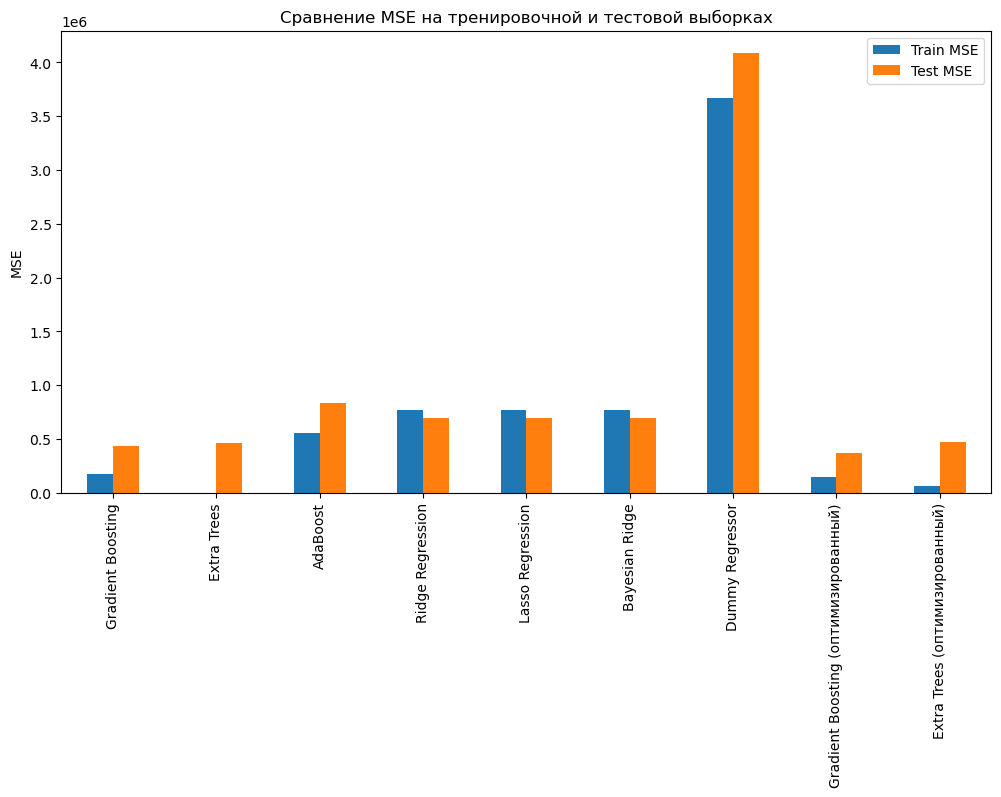

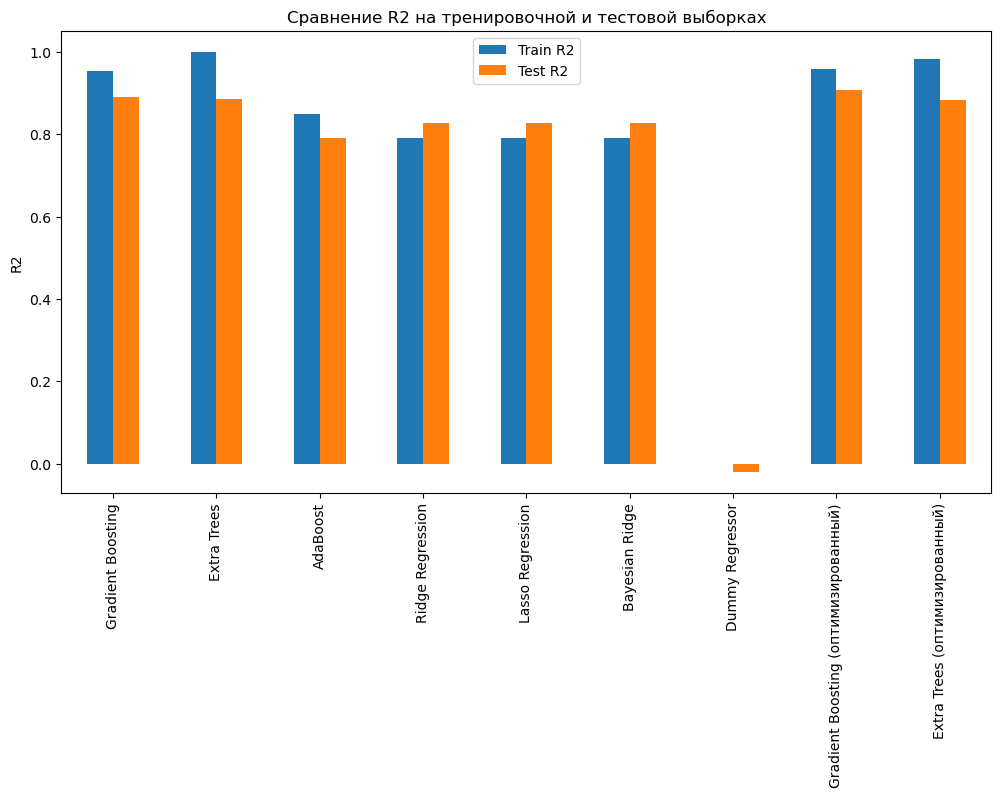

In [11]:
# Вывод результатов
logger.info("Вывод результатов")

for name, metrics in results.items():
    print(f"Модель: {name}")
    print(f"Train MSE: {metrics['Train MSE']:.2f}, Test MSE: {metrics['Test MSE']:.2f}")
    print(f"Train MAE: {metrics['Train MAE']:.2f}, Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Train R2: {metrics['Train R2']:.2f}, Test R2: {metrics['Test R2']:.2f}")
    print("-" * 40)

# Визуализация результатов
metrics_df = pd.DataFrame(results).T
metrics_df[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение MSE на тренировочной и тестовой выборках')
plt.ylabel('MSE')
plt.show()

metrics_df[['Train R2', 'Test R2']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение R2 на тренировочной и тестовой выборках')
plt.ylabel('R2')
plt.show()

In [ ]:
"""
Лучшие модели:
Gradient Boosting (оптимизированный) показывает наилучшее качество (R2 = 0.91 на тестовых данных).
Extra Trees (оптимизированный) также показывает хорошее качество, но требует дальнейшей настройки для уменьшения переобучения.

Линейные модели:
Ridge, Lasso и Bayesian Ridge показывают стабильное, но более низкое качество (R2 = 0.83).
Эти модели хуже ансамблевых методов, но лучше, чем Dummy Regressor.

AdaBoost: Показывает среднее качество (R2 = 0.79) и требует настройки.

Dummy Regressor: Используется как базовый уровень для сравнения.
"""

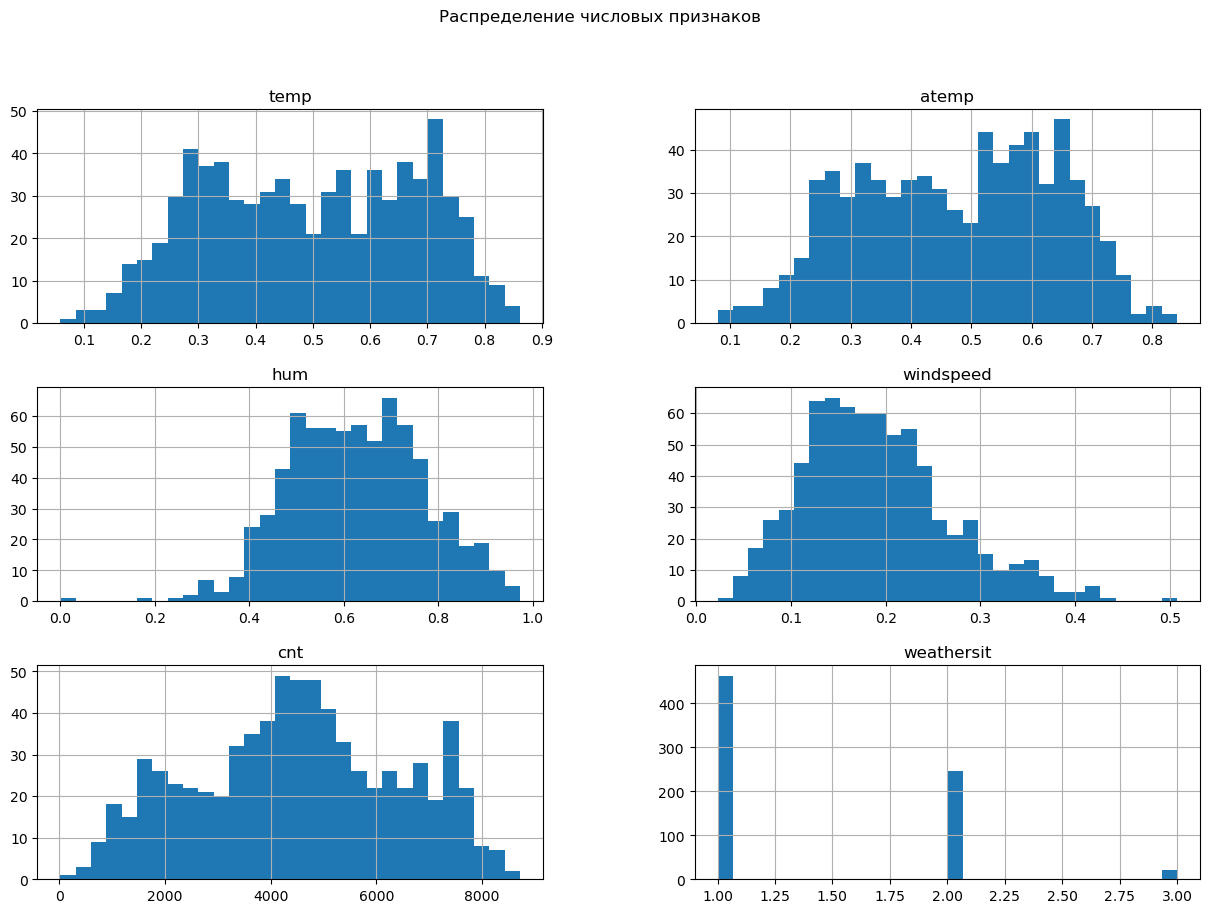

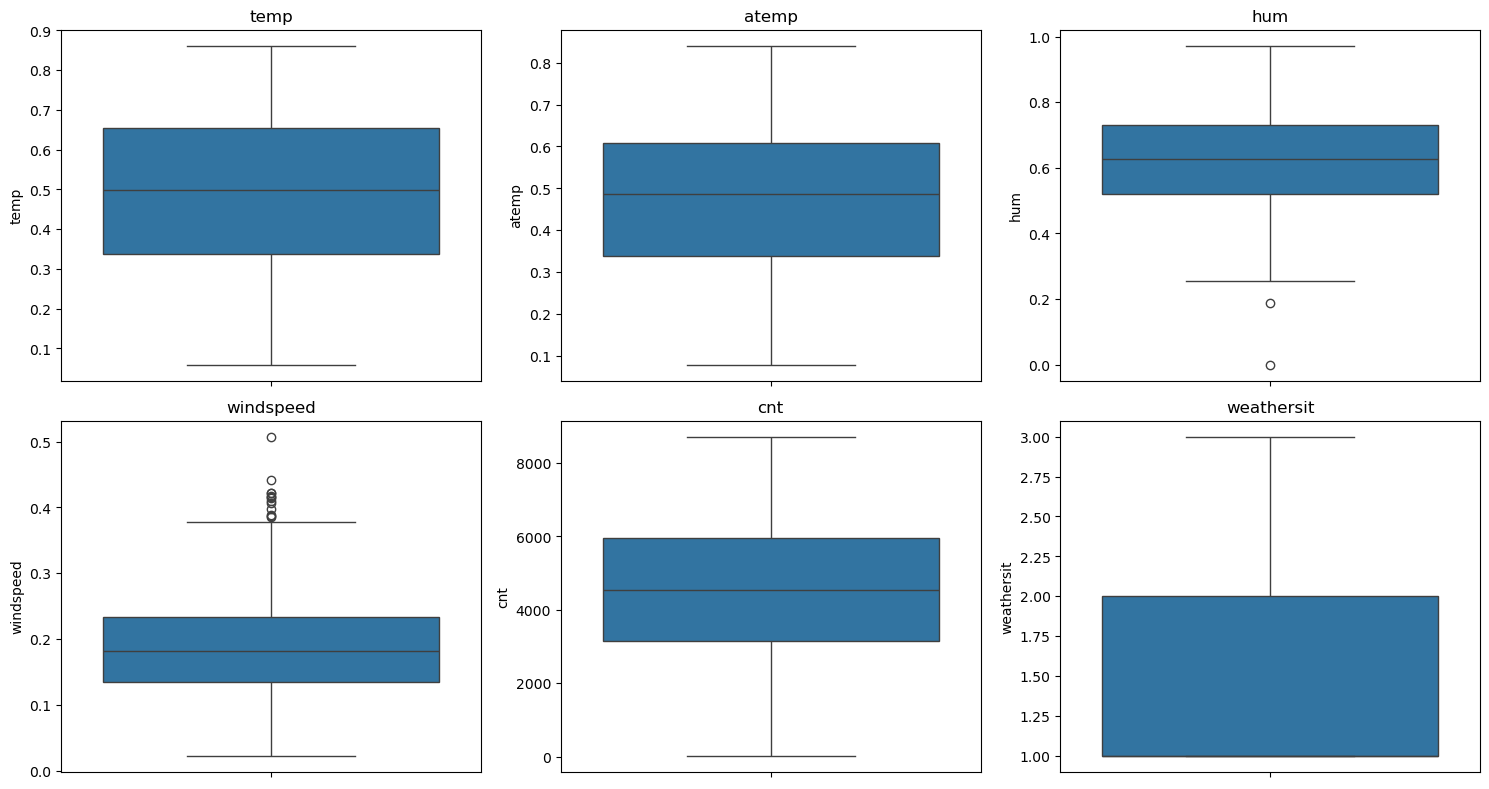

Корреляция с целевой переменной (cnt):
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [12]:
# поработаем с исходным датасетом, с целью улучшить показатели моделей
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'weathersit']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Распределение числовых признаков')
plt.show()

# Boxplot для поиска выбросов
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
correlation = df.corr()['cnt'].sort_values(ascending=False)
print("Корреляция с целевой переменной (cnt):")
print(correlation)

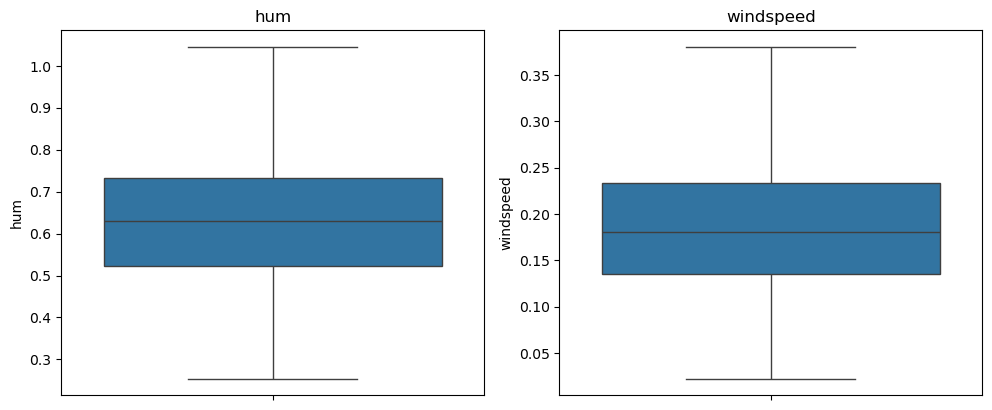

In [14]:
#  hum, windspeed -  есть выбросы.
# df2 = df.drop(['hum', 'windspeed', 'holiday'], axis=1)  - оказалось плохим вариантом, почти все ушло в переобучение
# Функция для замены выбросов на верхнюю границу усов
def replace_outliers_with_median(df, column):
    # Вычисляем квартили и IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Определяем границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Находим медиану
    # median = df[column].median() все-равновыходит за переделы

    # Заменяем выбросы на верхнюю границу усов
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound),  # Условие для выбросов
        upper_bound,  # Значение для замены
        df[column]  # Оставить без изменений
    )    
     
    return df

# Применяем функции к столбцам
df_copy = df.copy() #сделаем копию датасета

df2 = replace_outliers_with_median(df_copy, 'hum')
df2 = replace_outliers_with_median(df_copy, 'windspeed')

numerical_features = ['hum', 'windspeed']
# Boxplot для поиска выбросов
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df2[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [15]:
# выбрососв больше  нет

2025-03-09 21:49:58,826 - INFO - Начало обучения моделей.
2025-03-09 21:49:58,827 - INFO - Обучение модели: Gradient Boosting


Лучшие параметры для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75, 'subsample': 0.7}
Лучшие параметры для Extra Trees: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Ridge Regression CV MSE: 63.85
Lasso Regression CV MSE: 0.02
Bayesian Ridge CV MSE: 0.00


2025-03-09 21:49:59,006 - INFO - Обучение модели: Extra Trees
2025-03-09 21:49:59,304 - INFO - Обучение модели: AdaBoost
2025-03-09 21:49:59,456 - INFO - Обучение модели: Ridge Regression
2025-03-09 21:49:59,463 - INFO - Обучение модели: Lasso Regression
2025-03-09 21:49:59,469 - INFO - Обучение модели: Bayesian Ridge
2025-03-09 21:49:59,476 - INFO - Обучение модели: Dummy Regressor
2025-03-09 21:49:59,481 - INFO - Обучение модели: Gradient Boosting (оптимизированный)
2025-03-09 21:49:59,563 - INFO - Обучение модели: Extra Trees (оптимизированный)
2025-03-09 21:49:59,664 - INFO - Обучение моделей завершено.


Модель: Gradient Boosting
Train MSE: 3848.66, Test MSE: 10009.37
Train MAE: 47.69, Test MAE: 72.49
Train R2: 1.00, Test R2: 1.00
----------------------------------------
Модель: Extra Trees
Train MSE: 0.00, Test MSE: 12186.86
Train MAE: 0.00, Test MAE: 63.18
Train R2: 1.00, Test R2: 1.00
----------------------------------------
Модель: AdaBoost
Train MSE: 59927.24, Test MSE: 78901.40
Train MAE: 196.90, Test MAE: 229.44
Train R2: 0.98, Test R2: 0.98
----------------------------------------
Модель: Ridge Regression
Train MSE: 35.79, Test MSE: 39.07
Train MAE: 4.50, Test MAE: 4.46
Train R2: 1.00, Test R2: 1.00
----------------------------------------
Модель: Lasso Regression
Train MSE: 0.01, Test MSE: 0.02
Train MAE: 0.10, Test MAE: 0.10
Train R2: 1.00, Test R2: 1.00
----------------------------------------
Модель: Bayesian Ridge
Train MSE: 0.00, Test MSE: 0.00
Train MAE: 0.00, Test MAE: 0.00
Train R2: 1.00, Test R2: 1.00
----------------------------------------
Модель: Dummy Regressor
Tr

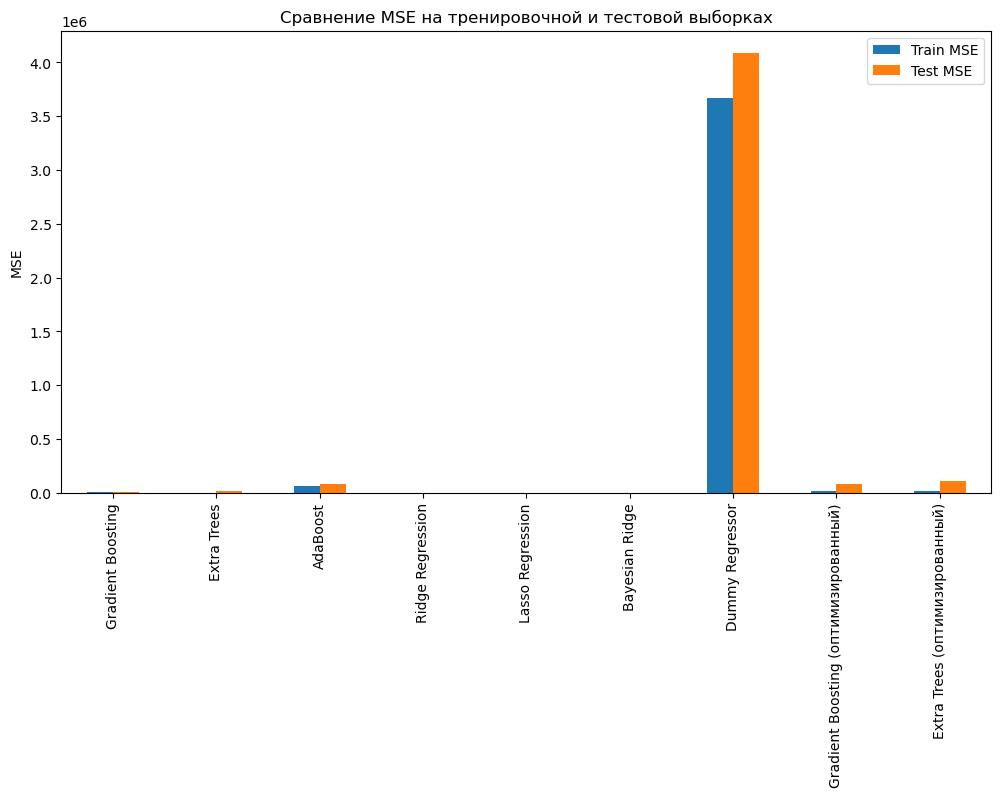

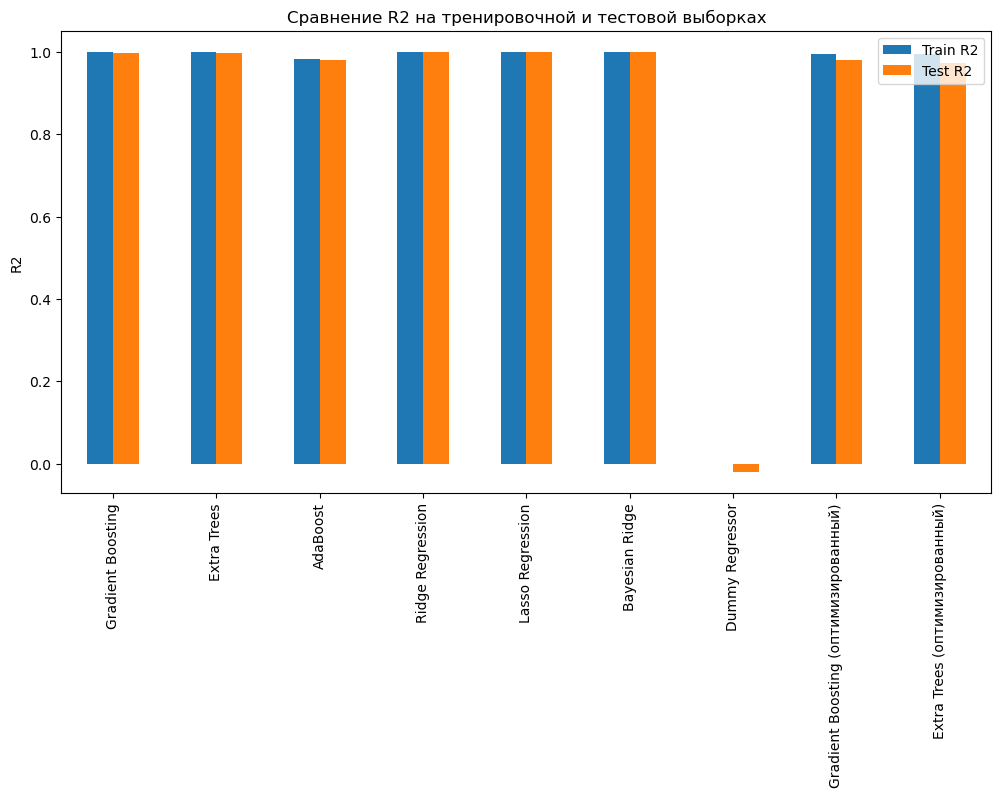

2025-03-09 21:50:00,009 - INFO - Анализ завершен.


In [21]:
# Разделение на признаки и целевую переменную
X = df2.drop('cnt', axis=1)
y = df2['cnt']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Поиск лучших параметров для Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_search = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_search.fit(X_train, y_train)

# Поиск лучших параметров для Extra Trees
et_model = ExtraTreesRegressor(random_state=42)
et_search = RandomizedSearchCV(et_model, et_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=20)
et_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для Gradient Boosting:", gb_search.best_params_)
print("Лучшие параметры для Extra Trees:", et_search.best_params_)

# Обучение моделей с лучшими параметрами
best_gb = gb_search.best_estimator_
best_et = et_search.best_estimator_

# Добавление кросс-валидации для линейных регрессоров
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression CV MSE: {-np.mean(ridge_scores):.2f}")
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1, max_iter=5000)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression CV MSE: {-np.mean(lasso_scores):.2f}")
lasso_model.fit(X_train, y_train)

bayesian_model = BayesianRidge()
bayesian_scores = cross_val_score(bayesian_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Bayesian Ridge CV MSE: {-np.mean(bayesian_scores):.2f}")
bayesian_model.fit(X_train, y_train)

# Оценка качества моделей
#models.update({
#    "Gradient Boosting (оптимизированный)": best_gb_2,
#    "Extra Trees (оптимизированный)": best_et_2
#})

# Обучение моделей
results2 = {}
logger.info("Начало обучения моделей.")

for name, model in models.items():
    logger.info(f"Обучение модели: {name}")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Расчет метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results2[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R2": train_r2,
        "Test R2": test_r2
    }

# Логирование
logger.info("Обучение моделей завершено.")

# Вывод результатов
for name, metrics in results2.items():
    print(f"Модель: {name}")
    print(f"Train MSE: {metrics['Train MSE']:.2f}, Test MSE: {metrics['Test MSE']:.2f}")
    print(f"Train MAE: {metrics['Train MAE']:.2f}, Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Train R2: {metrics['Train R2']:.2f}, Test R2: {metrics['Test R2']:.2f}")
    print("-" * 40)

# Визуализация результатов
metrics_df = pd.DataFrame(results2).T
metrics_df[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение MSE на тренировочной и тестовой выборках')
plt.ylabel('MSE')
plt.show()

metrics_df[['Train R2', 'Test R2']].plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение R2 на тренировочной и тестовой выборках')
plt.ylabel('R2')
plt.show()

# Логирование
logger.info("Анализ завершен.")

In [ ]:
"""
Оптимизированные параметры для Gradient Boosting и Extra Trees были  подобраны. 
Эти параметры помогают улучшить качество моделей и уменьшить переобучение.
----------------------------------------------------------------------------
Линейные модели показывают очень низкие ошибки на кросс-валидации.
Это подтверждает, что исходные данные имеют сильные линейные зависимости.
"""